In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
from web import *
from bootstrap import *
from data import *
from rp_data import *

#source_to_df(start year, end year, directory to save to, download data if needed)
relievers, salaries = source_to_df(2015, 2019, directory='data', download=False)

dfs = [clean_df(merge_df(r, s)) for r, s in zip(relievers, salaries)]
dfs = [exclusion(df) for df in dfs]

col_names = ['RAA','RAR', 'RA9', 'WAA', 'WAR']
for df in dfs:
    df.reset_index(drop= True)
    salary_to_int(df)
    for col_name in col_names:
        column_to_num(df, col_name)

data = rp_data(dfs)

cols = ['RA9', 'RAA', 'RAR', 'WAA', 'WAR']

In [2]:
data.create_df('2019', 80, cols)

,p-values,hp_means,lp_means
RA9,0.017098,4.523333,5.278362
RAA,0.020215,1.400000,-1.372881
RAR,0.016419,6.355556,3.163842
WAA,0.021000,0.142222,-0.125989
WAR,0.020751,0.584444,0.262712


In [3]:
data.create_sum_df(80, cols)

,p-values,hp_means,lp_means
RA9,0.000777,4.228079,4.768947
RAA,0.002282,1.802956,-0.044610
RAR,0.002205,6.724138,4.633209
WAA,0.002338,0.197044,0.007683
WAR,0.000321,0.683744,0.416605


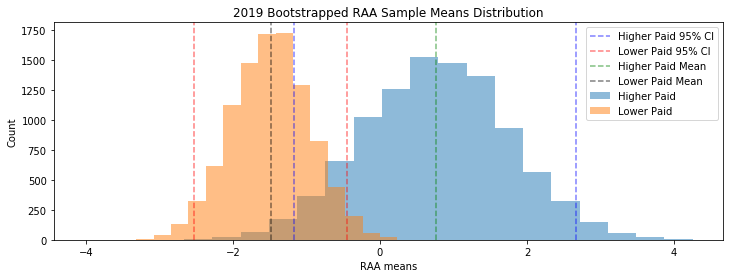

In [4]:
data.bootstrap('2019', 70, 'RAA', 10000)

In [5]:
data.bootstrap_stats()


    The 95% confidence intervals for the higher paid group ranges from -1.164179104477612 to 2.671641791044776.
    The lower paid group ranges from -2.529032258064516 and -0.45161290322580644.
    Means of the distribution - 
    Higher Paid Group: 0.7628940298507463
    Lower Paid Group:-1.485141935483871
     


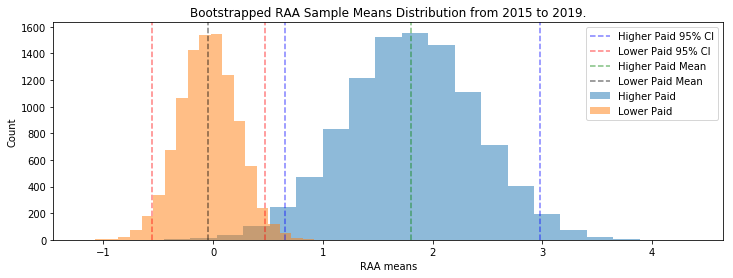

In [6]:
data.bootstrap_sum(80, 'RAA', 10000)

In [7]:
data.bootstrap_sum_stats()


    The 95% confidence intervals for the higher paid group ranges from 0.6501231527093597 to 2.9753694581280787.
    The lower paid group ranges from -0.5613692688971499 and 0.46964064436183395.
    Means of the distribution - 
    Higher Paid Group: 1.8044448275862068
    Lower Paid Group:-0.04484423791821562
     


In [8]:
data.corr('2019', 70, 'RAA')

For the lower paid pitcher group: 
The correlation coefficent is 0.21077645192899985 and the p-value is 0.008474721158704807
For the higher paid pitcher group: 
The correlation coefficent is -0.07903372293183192 and the p-value is 0.5249457853542268


In [10]:
data.corr_sum(70, 'WAR')

For the lower paid pitcher group: 
The correlation coefficent is 0.05847989597949605 and the p-value is 0.12056060454679446
For the higher paid pitcher group: 
The correlation coefficent is 0.04249376133944226 and the p-value is 0.46040186050459353


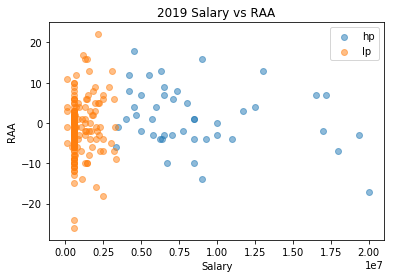

In [12]:
data.scatter('2019', 80, 'RAA')

In [13]:
data.IS('2017', 80)

For the MLB season of 2017, the inherited runners scored % for the higher paid group is 0.26075
and the lower paid group % is 0.2896815286624205 with a p-value of 0.32776612154529094.


In [14]:
data.SV('2018', 70)

For the MLB season of 2018, the save opportunities converted % for the higher paid group is 0.47358490566037753
and the lower paid group % is 0.3935051546391753 with a p-value of 0.20389992743623975.
